In [1]:
#genes found to be significant:
#total- NLGN4Y, YPEL3, TUFM,TUBGCP5, GNB1L, AIFM3
#comm- ZG16, GDPD3, YPEL3, PRRT2, TUBGCP5, DOC2A, RTN4R, TBX1
#social- NLGN4Y, YPEL3, TUFM, TUBGCP5, GNB1L, AIFM3
#rrb- NLGN4Y, TXNRD2, AIFM3

In [9]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
import ants
import os
from tqdm import tqdm
import statistics
import statsmodels.api as sm

In [20]:
cd ../../Data/Genemaps

/mmfs1/data/pijarj/BC-ORG-Data/Data/Genemaps


In [21]:
#read in symptom patient data and slice out important columns
df = pd.read_csv('/mmfs1/data/pijarj/Data4Julianna/df_patients_S699.csv')
df.columns
df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']]

,ados_total,ados_comm,ados_social,ados_rrb
0,18.0,6.0,12.0,2.0
1,NaN,NaN,NaN,NaN
2,13.0,4.0,9.0,NaN
3,12.0,4.0,8.0,2.0
4,16.0,5.0,11.0,3.0
...,...,...,...,...
694,NaN,NaN,NaN,NaN
695,NaN,NaN,NaN,NaN
696,13.0,4.0,9.0,2.0
697,8.0,2.0,6.0,2.0


In [22]:
#load in cmat data
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')
diffmat = np.load('/mmfs1/data/pijarj/Data4Julianna/recon_asd_mu.npz')
diffmat = diffmat['data']
diffmat.shape

(699, 51, 51)

In [23]:
genemaps = [file for file in os.listdir() if file.endswith('.nii.gz')]
genemaps.sort()

In [24]:
nsubjects = 699
ngenes = len(genemaps)
print(nsubjects)
print(ngenes)

gene_fmri_corr = np.zeros((ngenes,nsubjects))
gene_fmri_corr

699
13


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
for g in tqdm(range(ngenes)):
    gene_im = ants.image_read(genemaps[g])
    gene_flat = gene_im.numpy().flatten()
    atlas_flat = atlas.numpy().flatten()
    roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
    gene_sim = np.zeros((51,51))
    for i in range(51):
        for j in range(51):
            gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])

    triu = np.triu_indices(51,k=1)
    gene_vec = gene_sim[triu]

    for s in range(nsubjects):
        subject_diffmat = diffmat[s,:,:] # correlation matrices for one subject
        fmri_vec = subject_diffmat[triu]
        data = np.corrcoef(gene_vec,fmri_vec)[0,1]
        gene_fmri_corr[g,s] = data

100%|██████████| 13/13 [00:01<00:00,  9.39it/s]


(13, 699)

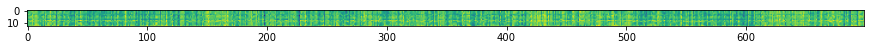

In [26]:
plt.figure(figsize=(15,10))
plt.imshow(gene_fmri_corr)
gene_fmri_corr.shape

In [27]:
col_id = 0
Y_total = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_total = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_total = ~np.isnan(Y_total)[:,col_id]
Y_use_total = Y_total[good_subjects_total,col_id] 
X_use_total = gene_fmri_corr[:,good_subjects_total]
X_use_total = X_use_total.transpose()
regression_total =  linear_model.LinearRegression(normalize=True)
linear_regression_total = regression_total.fit(X_use_total,Y_use_total) 
Y_use_hat_total = linear_regression_total.predict(X_use_total)

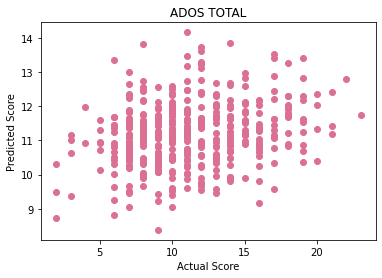

In [28]:
#scatter plot for ados_total
plt.scatter(Y_use_total,Y_use_hat_total,color='palevioletred')
plt.title('ADOS TOTAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [29]:
col_id = 1
Y_comm = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_comm = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_comm = ~np.isnan(Y_comm)[:,col_id]
Y_use_comm = Y_comm[good_subjects_comm,col_id] 
X_use_comm = gene_fmri_corr[:,good_subjects_comm]
X_use_comm = X_use_comm.transpose()
regression_comm =  linear_model.LinearRegression(normalize=True)
linear_regression_comm = regression_comm.fit(X_use_comm,Y_use_comm) 
Y_use_hat_comm = linear_regression_comm.predict(X_use_comm)

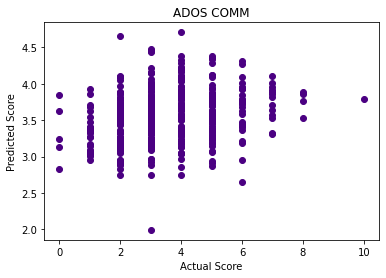

In [30]:
#scatter plot for ados_comm
plt.scatter(Y_use_comm,Y_use_hat_comm,color='indigo')
plt.title('ADOS COMM')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [31]:
col_id = 2
Y_social = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_social = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_social = ~np.isnan(Y_social)[:,col_id]
Y_use_social = Y_social[good_subjects_social,col_id] 
X_use_social = gene_fmri_corr[:,good_subjects_social]
X_use_social = X_use_social.transpose()
regression_social =  linear_model.LinearRegression(normalize=True)
linear_regression_social = regression_social.fit(X_use_social,Y_use_social) 
Y_use_hat_social = linear_regression_social.predict(X_use_social)

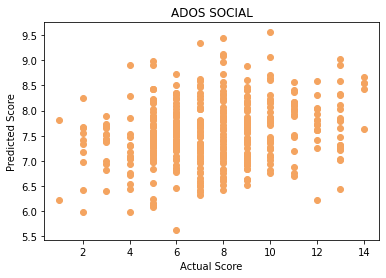

In [32]:
#scatter plot for ados_social
plt.scatter(Y_use_social,Y_use_hat_social,color='sandybrown')
plt.title('ADOS SOCIAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [33]:
col_id = 3
Y_rrb = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_rrb = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_rrb = ~np.isnan(Y_rrb)[:,col_id]
Y_use_rrb = Y_rrb[good_subjects_rrb,col_id] 
X_use_rrb = gene_fmri_corr[:,good_subjects_rrb]
X_use_rrb = X_use_rrb.transpose()
regression_rrb =  linear_model.LinearRegression(normalize=True)
linear_regression_rrb = regression_rrb.fit(X_use_rrb,Y_use_rrb) 
Y_use_hat_rrb = linear_regression_rrb.predict(X_use_rrb)

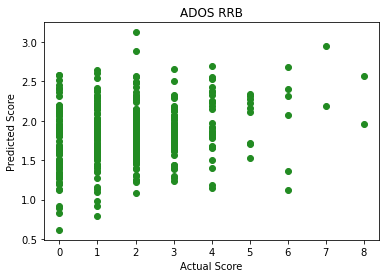

In [34]:
#scatter plot for ados_rrb
plt.scatter(Y_use_rrb,Y_use_hat_rrb,color='forestgreen')
plt.title('ADOS RRB')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [35]:
#variance explained for ados_total
from sklearn.metrics import explained_variance_score
total = explained_variance_score(Y_use_total,Y_use_hat_total)*100
print(total)

5.929860132891562


In [36]:
#variance explained for ados_comm
from sklearn.metrics import explained_variance_score
comm = explained_variance_score(Y_use_comm,Y_use_hat_comm)*100
print(comm)

5.239348651718623


In [37]:
#variance explained for ados_social
from sklearn.metrics import explained_variance_score
social = explained_variance_score(Y_use_social,Y_use_hat_social)*100
print(social)

5.339429031007392


In [38]:
#variance explained for ados_rrb
from sklearn.metrics import explained_variance_score
rrb = explained_variance_score(Y_use_rrb,Y_use_hat_rrb)*100
print(rrb)

6.408607103749919


Text(0.5, 0, 'Symptom')

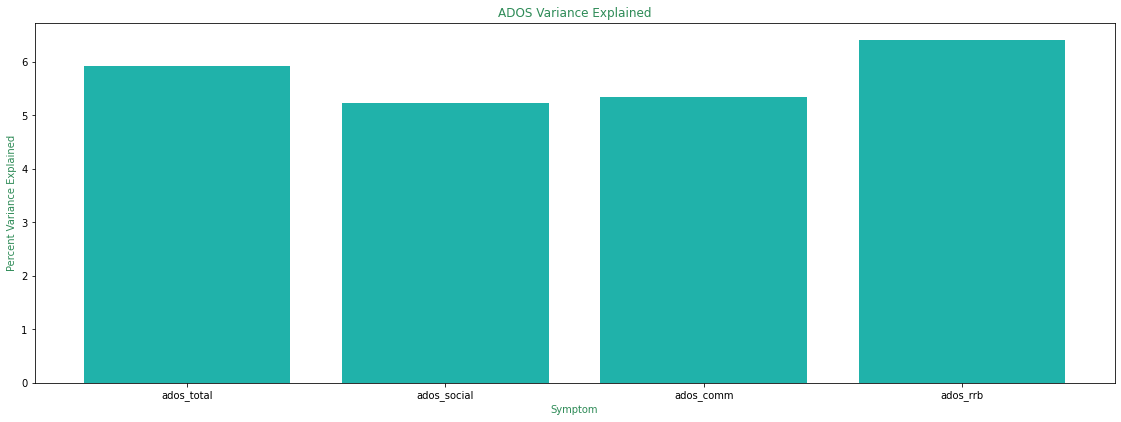

In [39]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
var_explained = total, comm, social, rrb
plt.bar(ados_label,var_explained,color='lightseagreen')
plt.title('ADOS Variance Explained',color='seagreen')
plt.ylabel('Percent Variance Explained',color='seagreen')
plt.xlabel('Symptom',color='seagreen')

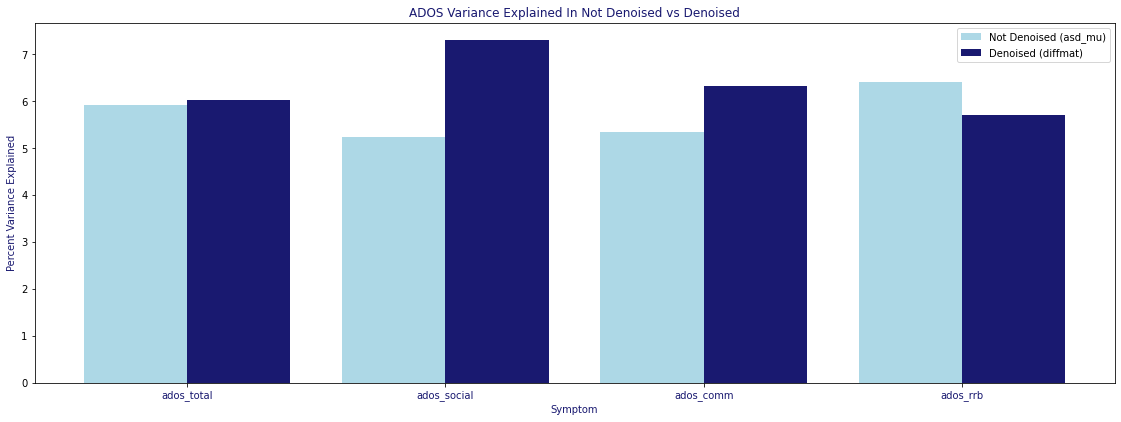

In [40]:
#variance explained of denoised vs not denoised
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
x_axis = np.arange(len(ados_label))

#not denoised is asd_mu
not_denoised = var_explained

#denoised is diffmat
denoised = [6.024568105760708,7.304929665233917,6.332523981503235,5.708875774119393]

#plot bar graph
plt.bar(x_axis-0.2,not_denoised,0.4,label='Not Denoised (asd_mu)',color='lightblue')
plt.bar(x_axis+0.2,denoised,0.4,label='Denoised (diffmat)',color='midnightblue')
plt.title('ADOS Variance Explained In Not Denoised vs Denoised',color='midnightblue')
plt.xticks(x_axis, ados_label,color='midnightblue')
plt.xlabel('Symptom',color='midnightblue')
plt.ylabel('Percent Variance Explained',color='midnightblue')
plt.legend()
plt.show()

In [41]:
#correlation coefficents for ados_total
coefficient_total = regression_total.coef_
labels = ['TXNRD2','ZG16','NLGN4Y','GNB1L','RTN4R','GDPD3','YPEL3','TBX1','TUFM','PRRT2','TUBGCP5','AIFM3','DOC2A']
print(column_total)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_total[i]}')

ados_total

TXNRD2,12.11596065710413
ZG16,4.361913426300148
NLGN4Y,-13.216549977396639
GNB1L,7.308453234638331
RTN4R,6.753307882316343
GDPD3,3.661710365306316
YPEL3,15.824708799029246
TBX1,-16.18887480625233
TUFM,-22.868426250502157
PRRT2,-11.65691619720191
TUBGCP5,-9.067403973666348
AIFM3,6.818389632536967
DOC2A,5.07842498816404


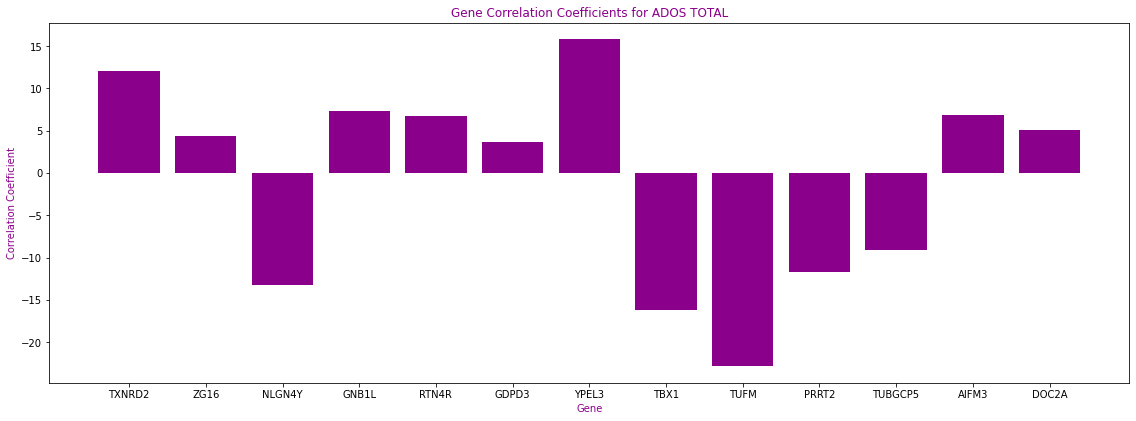

In [45]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_total,color='darkmagenta')
plt.title('Gene Correlation Coefficients for ADOS TOTAL',color='darkmagenta')
plt.ylabel('Correlation Coefficient',color='darkmagenta')
plt.xlabel('Gene',color='darkmagenta')
plt.show()

In [46]:
#correlation coefficents for ados_comm
coefficient_comm = regression_comm.coef_
print(column_comm)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_comm[i]}')

ados_comm

TXNRD2,5.086824273409511
ZG16,2.5585599623406727
NLGN4Y,-3.616069768804084
GNB1L,2.0238869586016017
RTN4R,4.516170602842721
GDPD3,1.8273967664523199
YPEL3,4.343098235134742
TBX1,-7.323091692738122
TUFM,-6.798904950161341
PRRT2,-5.229317783702452
TUBGCP5,-4.473880750397193
AIFM3,0.934780070159279
DOC2A,2.921567890967851


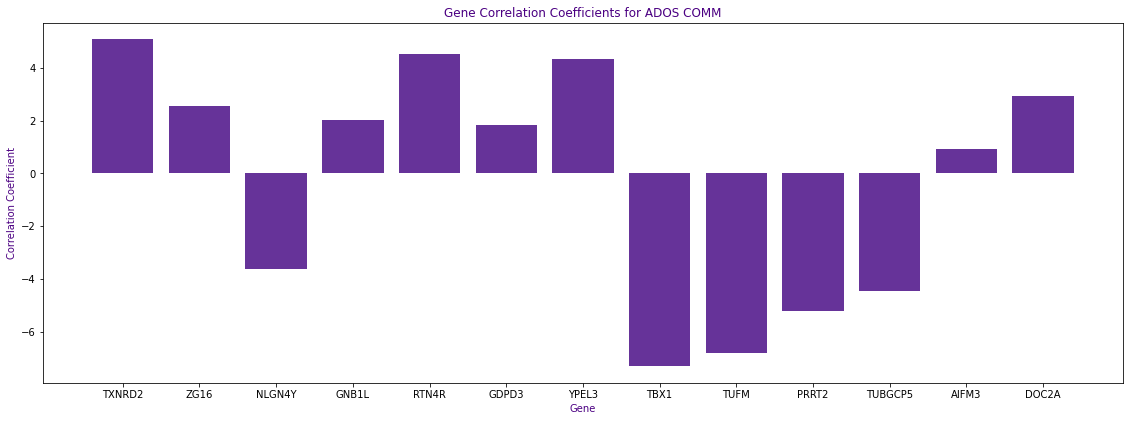

In [47]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_comm,color='rebeccapurple')
plt.title('Gene Correlation Coefficients for ADOS COMM',color='indigo')
plt.ylabel('Correlation Coefficient',color='indigo')
plt.xlabel('Gene',color='indigo')
plt.show()

In [48]:
#correlation coefficents for ados_social
coefficient_social = regression_social.coef_
print(column_social)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_social[i]}')

ados_social

TXNRD2,5.528508206623571
ZG16,5.159491767963854
NLGN4Y,-8.90288318992737
GNB1L,6.233752425405929
RTN4R,2.632196033871371
GDPD3,-0.49581407908291947
YPEL3,10.343646606519185
TBX1,-8.47205315759989
TUFM,-15.86791401891397
PRRT2,-6.02480806169731
TUBGCP5,-5.836805140602131
AIFM3,6.672184150517101
DOC2A,2.2369964263635587


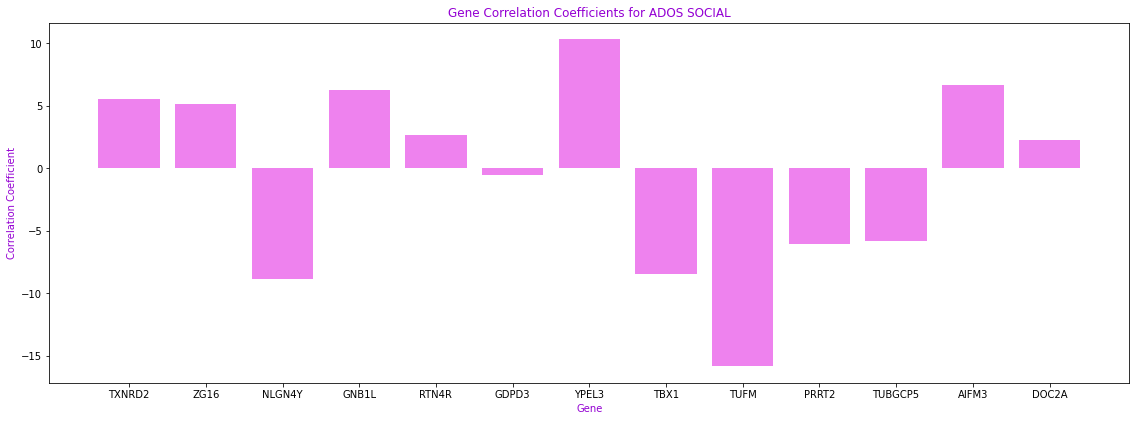

In [58]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_social,color='violet')
plt.title('Gene Correlation Coefficients for ADOS SOCIAL',color='darkviolet')
plt.ylabel('Correlation Coefficient',color='darkviolet')
plt.xlabel('Gene',color='darkviolet')
plt.show()

In [59]:
#correlation coefficents for ados_rrb
coefficient_rrb = regression_rrb.coef_
print(column_rrb)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_rrb[i]}')

ados_rrb

TXNRD2,4.61031726554834
ZG16,2.8215958551802283
NLGN4Y,-3.1277001352260814
GNB1L,3.9470872155410746
RTN4R,-6.40474721193562
GDPD3,-3.8149146487684655
YPEL3,2.4853235922888426
TBX1,-5.521800910891197
TUFM,-0.45596290854032057
PRRT2,1.809558557927073
TUBGCP5,-1.823740220221702
AIFM3,6.0709603591035615
DOC2A,1.6668713327935658


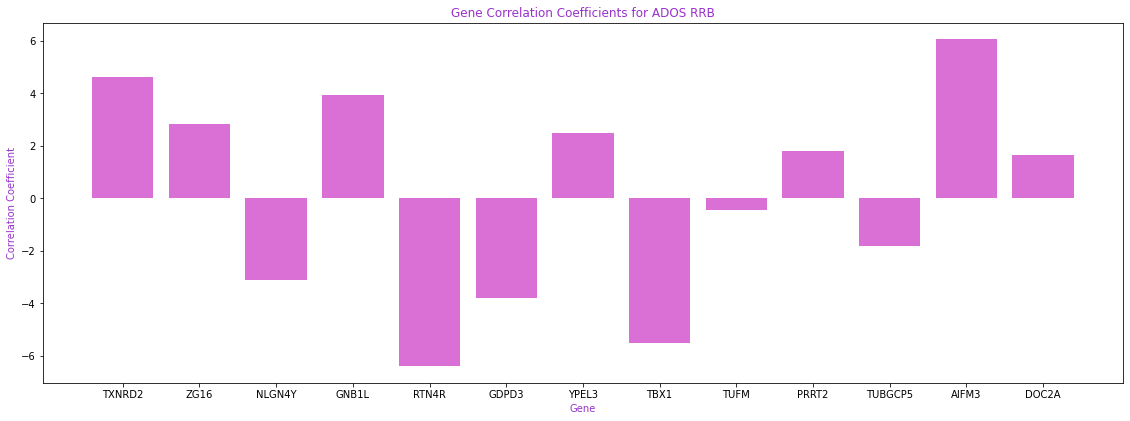

In [60]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_rrb,color='orchid')
plt.title('Gene Correlation Coefficients for ADOS RRB',color='darkorchid')
plt.ylabel('Correlation Coefficient',color='darkorchid')
plt.xlabel('Gene',color='darkorchid')
plt.show()

In [61]:
#significance of coefficients for ados_total
print('ADOS_TOTAL')
X_total = X_use_total.copy()
Y_total = Y_use_total.copy()
X_total = sm.add_constant(X_total)
print(X_total.shape)
print(Y_total.shape)

est_total = sm.OLS(Y_total, X_total)
est2_total = est_total.fit()
print(est2_total.summary())

ADOS_TOTAL
(429, 14)
(429,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.012
Date:                Mon, 07 Nov 2022   Prob (F-statistic):             0.0186
Time:                        14:21:28   Log-Likelihood:                -1176.7
No. Observations:                 429   AIC:                             2381.
Df Residuals:                     415   BIC:                             2438.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3422   

In [64]:
def plot_errorbar_from_table(est2_total,labels):
    coef_total = est2_total.params[1::]
    ci_total = est2_total.conf_int()[1::,:]
    ci_rel_total = abs(np.vstack((coef_total,coef_total)).transpose() - ci_total)
    ci_rel_total = ci_rel_total.transpose()
    xs_total = np.arange(len(coef_total))

    plt.figure(figsize=(15,5))
    plt.bar(xs_total,coef_total,color='lightcoral')
    plt.errorbar(xs_total,coef_total,ci_rel_total,fmt='r ',capsize=10,ecolor='maroon')
    plt.xticks(xs_total,labels=labels);

Text(0.5, 0, 'Gene')

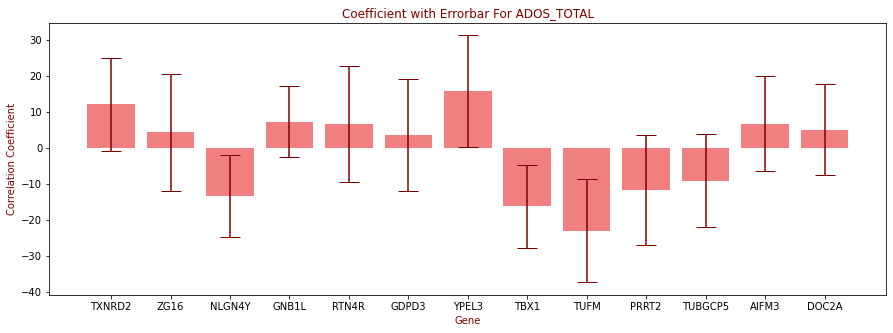

In [65]:
plot_errorbar_from_table(est2_total,labels)
plt.title('Coefficient with Errorbar For ADOS_TOTAL',color='maroon')
plt.ylabel('Correlation Coefficient',color='maroon')
plt.xlabel('Gene',color='maroon')

In [66]:
#significance of coefficients for ados_comm
print('ADOS_COMM')
X_comm = X_use_comm.copy()
Y_comm = Y_use_comm.copy()
X_comm = sm.add_constant(X_comm)

est_comm = sm.OLS(Y_comm, X_comm)
est2_comm = est_comm.fit()
print(est2_comm.summary())

ADOS_COMM
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.688
Date:                Mon, 07 Nov 2022   Prob (F-statistic):             0.0609
Time:                        14:21:51   Log-Likelihood:                -763.56
No. Observations:                 411   AIC:                             1555.
Df Residuals:                     397   BIC:                             1611.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5963      0.250     14.38

In [69]:
def plot_errorbar_from_table(est2_comm,labels):
    coef_comm = est2_comm.params[1::]
    ci_comm = est2_comm.conf_int()[1::,:]
    ci_rel_comm = abs(np.vstack((coef_comm,coef_comm)).transpose() - ci_comm)
    ci_rel_comm = ci_rel_comm.transpose()
    xs_comm = np.arange(len(coef_comm))

    plt.figure(figsize=(15,5))
    plt.bar(xs_comm,coef_comm,color='thistle')
    plt.errorbar(xs_comm,coef_comm,ci_rel_comm,fmt='r ',capsize=10,ecolor='indigo')
    plt.xticks(xs_comm,labels=labels);

Text(0.5, 0, 'Gene')

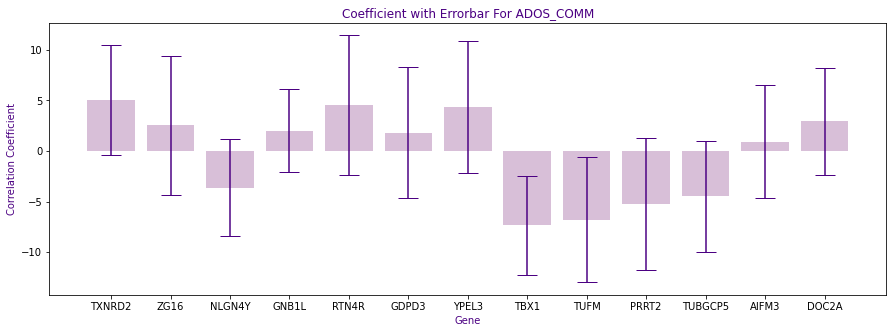

In [70]:
plot_errorbar_from_table(est2_comm,labels)
plt.title('Coefficient with Errorbar For ADOS_COMM',color='indigo')
plt.ylabel('Correlation Coefficient',color='indigo')
plt.xlabel('Gene',color='indigo')

In [71]:
#significance of coefficients for ados_social
print('ADOS_SOCIAL')
X_social = X_use_social.copy()
Y_social = Y_use_social.copy()
X_social = sm.add_constant(X_social)

est_social = sm.OLS(Y_social, X_social)
est2_social = est_social.fit()
print(est2_social.summary())

ADOS_SOCIAL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.727
Date:                Mon, 07 Nov 2022   Prob (F-statistic):             0.0532
Time:                        14:23:10   Log-Likelihood:                -986.96
No. Observations:                 412   AIC:                             2002.
Df Residuals:                     398   BIC:                             2058.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7677      0.426     18.

In [72]:
def plot_errorbar_from_table(est2_social,labels):
    coef_social = est2_social.params[1::]
    ci_social = est2_social.conf_int()[1::,:]
    ci_rel_social = abs(np.vstack((coef_social,coef_social)).transpose() - ci_social)
    ci_rel_social = ci_rel_social.transpose()
    xs_social = np.arange(len(coef_social))

    plt.figure(figsize=(20,8))
    plt.bar(xs_social,coef_social,color='powderblue')
    plt.errorbar(xs_social,coef_social,ci_rel_social,fmt='r ',capsize=10,ecolor='midnightblue')
    plt.xticks(xs_social,labels=labels);

Text(0.5, 0, 'Gene')

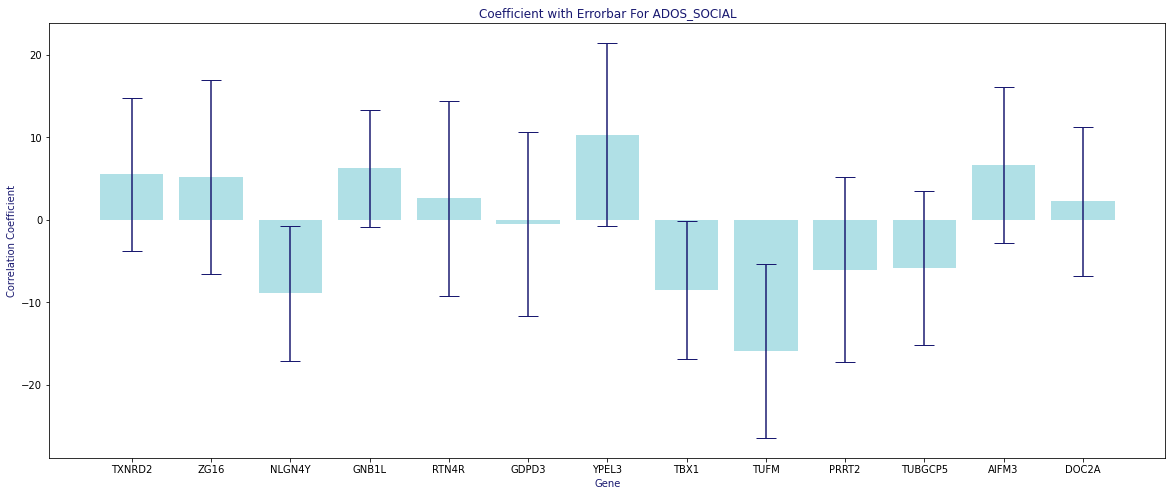

In [73]:
plot_errorbar_from_table(est2_social,labels)
plt.title('Coefficient with Errorbar For ADOS_SOCIAL',color='midnightblue')
plt.ylabel('Correlation Coefficient',color='midnightblue')
plt.xlabel('Gene',color='midnightblue')

In [74]:
#significance of coefficients for ados_rrb
print('ADOS_RRB')
X_rrb = X_use_rrb.copy()
Y_rrb = Y_use_rrb.copy()
X_rrb = sm.add_constant(X_rrb)

est_rrb = sm.OLS(Y_rrb, X_rrb)
est2_rrb = est_rrb.fit()
print(est2_rrb.summary())

ADOS_RRB
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.901
Date:                Mon, 07 Nov 2022   Prob (F-statistic):             0.0287
Time:                        14:23:18   Log-Likelihood:                -678.84
No. Observations:                 375   AIC:                             1386.
Df Residuals:                     361   BIC:                             1441.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0766      0.252      8.250

In [77]:
def plot_errorbar_from_table(est2_rrb,labels):
    coef_rrb = est2_rrb.params[1::]
    ci_rrb = est2_rrb.conf_int()[1::,:]
    ci_rel_rrb = abs(np.vstack((coef_rrb,coef_rrb)).transpose() - ci_rrb)
    ci_rel_rrb = ci_rel_rrb.transpose()
    xs_rrb = np.arange(len(coef_rrb))

    plt.figure(figsize=(15,5))
    plt.bar(xs_rrb,coef_rrb,color='darkseagreen')
    plt.errorbar(xs_rrb,coef_rrb,ci_rel_rrb,fmt='r ',capsize=10,ecolor='darkgreen')
    plt.xticks(xs_rrb,labels=labels);

Text(0.5, 0, 'Gene')

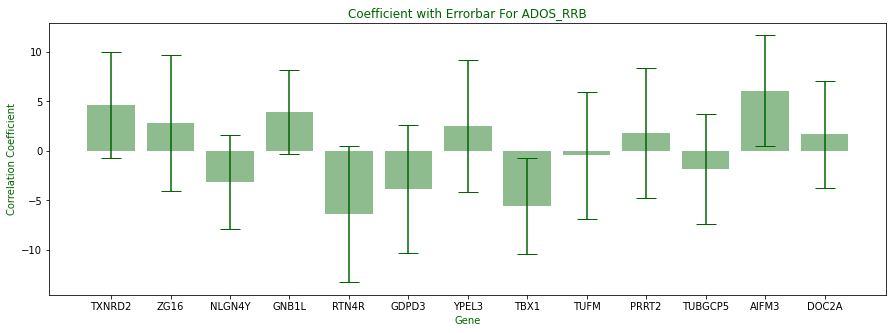

In [78]:
plot_errorbar_from_table(est2_rrb,labels)
plt.title('Coefficient with Errorbar For ADOS_RRB',color='darkgreen')
plt.ylabel('Correlation Coefficient',color='darkgreen')
plt.xlabel('Gene',color='darkgreen')